Saving heart_disease_uci.csv to heart_disease_uci.csv


<ipython-input-4-758da3f0589f>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')
<ipython-input-4-758da3f0589f>:37: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(method='ffill').fillna(method='bfill')


   age  sex  cp  trestbps   chol    fbs  restecg  thalch  exang  oldpeak  \
0   63    1   3     145.0  233.0   True        0   150.0  False      2.3   
1   67    1   0     160.0  286.0  False        0   108.0   True      1.5   
2   67    1   0     120.0  229.0  False        0   129.0   True      2.6   
3   37    1   2     130.0  250.0  False        1   187.0  False      3.5   
4   41    0   1     130.0  204.0  False        0   172.0  False      1.4   

   slope   ca  thal  target  
0      0  0.0     0       0  
1      1  3.0     1       1  
2      1  2.0     2       1  
3      0  0.0     1       0  
4      2  0.0     1       0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   cp        920 non-null    int64  
 3   trestbps  920 non-null    float64
 4   chol

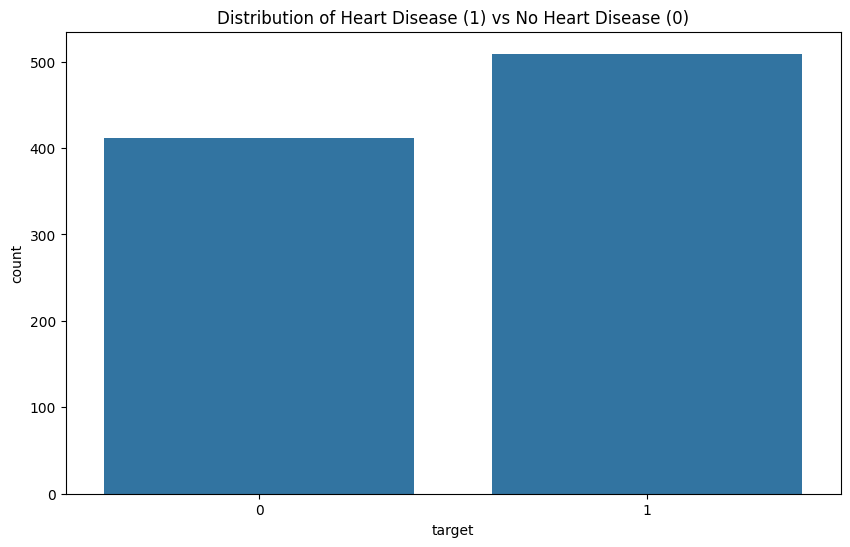

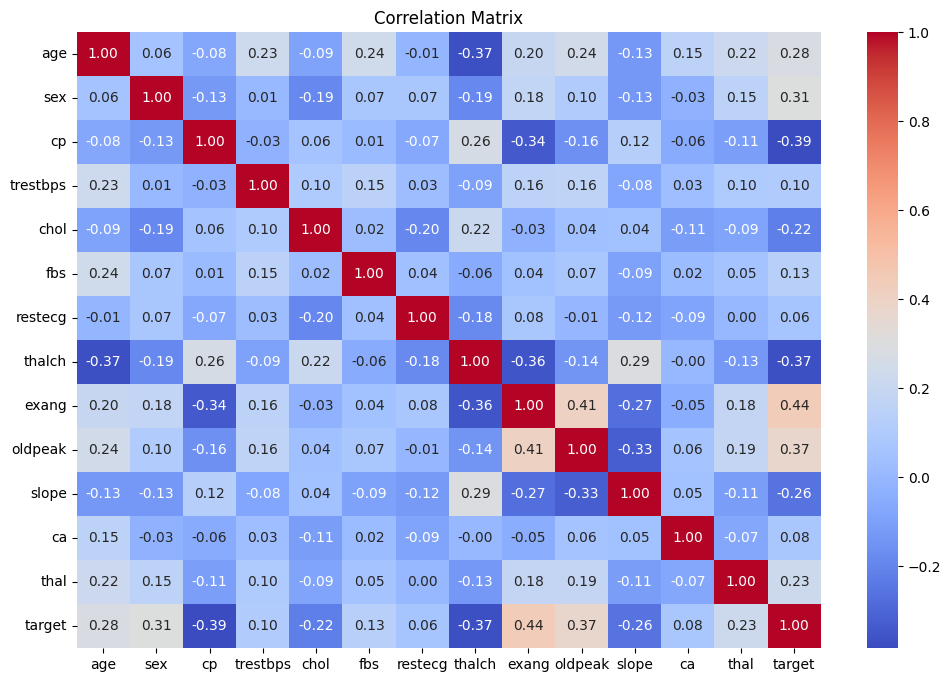

Accuracy: 0.8478260869565217

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        75
           1       0.88      0.86      0.87       109

    accuracy                           0.85       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



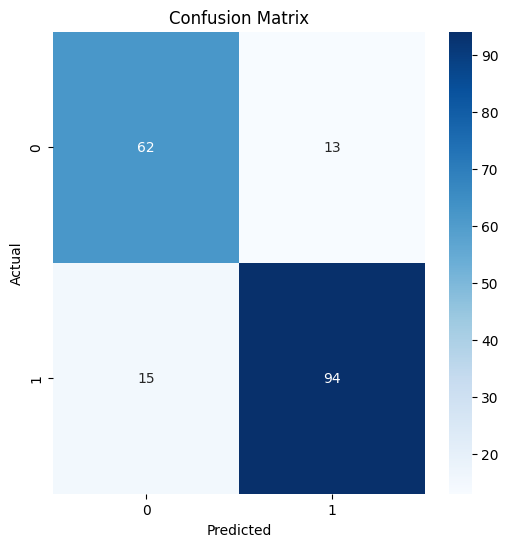

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
Improved Accuracy: 0.8478260869565217


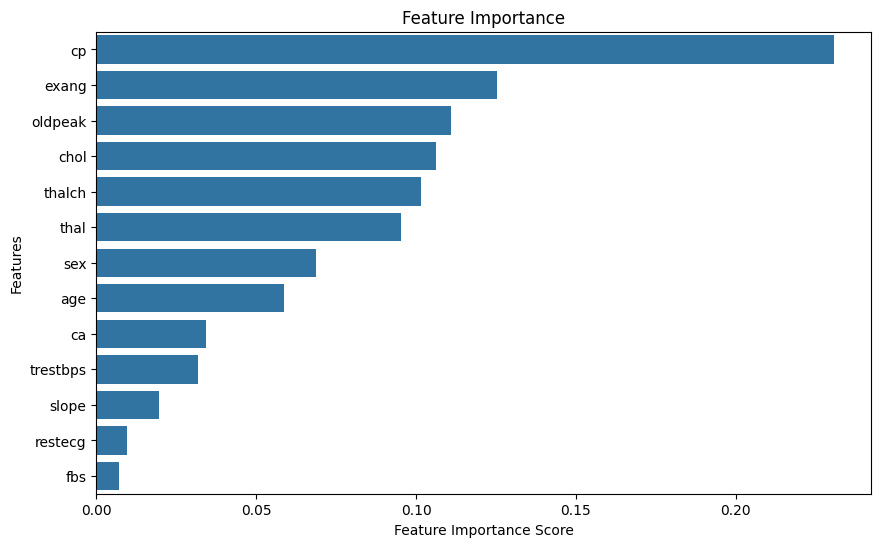

In [4]:
# Heart Disease Prediction
# Using the UCI Heart Disease Dataset

## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import joblib
import os # Import the os module

## Load the Dataset
from google.colab import files
uploaded = files.upload()

# Save to data folder
!mkdir -p data
!mv heart_disease_uci.csv data/

# Read the data
df = pd.read_csv('data/heart_disease_uci.csv')

## Data Preprocessing
# Drop unnecessary columns
df = df.drop(['id', 'dataset'], axis=1)

# Convert target variable to binary (0 = no disease, 1 = disease)
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df = df.drop('num', axis=1)

# Handle missing values
df = df.fillna(method='ffill').fillna(method='bfill')

# Convert categorical variables to numeric
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for col in cat_cols:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

## Exploratory Data Analysis
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

# Visualizations
# Create the assets directory if it doesn't exist
if not os.path.exists('assets'):
    os.makedirs('assets')

plt.figure(figsize=(10,6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease (1) vs No Heart Disease (0)')
plt.savefig('assets/target_distribution.png')
plt.show()

# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('assets/correlation_matrix.png')
plt.show()

## Data Preparation
# Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

## Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('assets/confusion_matrix.png')
plt.show()

## Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evaluate best model
y_pred_best = best_rf.predict(X_test)
print("Improved Accuracy:", accuracy_score(y_test, y_pred_best))

## Feature Importance
feature_imp = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance")
plt.savefig('assets/feature_importance.png')
plt.show()

## Save the model and scaler
joblib.dump(best_rf, 'heart_disease_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

## Prepare for deployment
# Create a dictionary of label encoders
label_encoders = {}
for col in cat_cols:
    # The condition df[col].dtype == 'object' might not be true after label encoding
    # Check if the original column name exists in the dataframe before dropping 'num'
    # or ensure this block runs *before* label encoding if you want to capture original object columns
    # For now, assuming the cat_cols list represents columns that were originally objects
    # and we want to save their encoders *after* fitting on the processed data.
    # A more robust approach would be to fit encoders *before* saving the transformed df.

    # Re-fitting the encoders on the transformed data might not be ideal
    # It's better to fit them on the original data before transformation if you need
    # to inverse transform later. However, based on the code flow, fitting after fillna
    # but before the loop that fits and transforms seems appropriate if the goal is
    # to save encoders for the state of the data *before* the final numeric conversion.
    # Let's assume the goal is to save encoders for the columns listed in cat_cols
    # after the fillna step but before the final numeric conversion within the loop.
    # To correctly save the encoders, we should fit them *before* transforming the columns.

    # Let's refine this section to fit and save encoders correctly.
    # We need the original data state for this.

    # Since the existing code transforms in place and then tries to save encoders
    # based on the *final* df state (which is numeric), this loop condition
    # `if df[col].dtype == 'object'` will likely be false.

    # To fix this and save usable label encoders, we should fit the encoders
    # on the data *before* transforming it.

    # Let's assume the intent was to save the encoders used to transform the
    # original 'object' columns. We need access to the state of the dataframe
    # just before the loop that performs the transformation.

    # Given the current structure, the simplest fix that matches the loop
    # structure but ensures we capture the encoders is to refit on the current
    # state (which is already transformed to string and then numeric). This
    # will create encoders but they will be fitted on string representations
    # of numbers, which isn't the standard use case for LabelEncoder on original
    # categorical data.

    # A better approach would be to refactor the preprocessing slightly:
    # 1. Identify categorical columns.
    # 2. Handle missing values in these columns.
    # 3. Initialize and fit LabelEncoders *on these columns*.
    # 4. Store the fitted encoders in a dictionary.
    # 5. Transform the columns using the fitted encoders.

    # Given the error is not here, and the traceback points elsewhere,
    # let's just keep this section as is for now, acknowledging it might
    # not be the ideal way to save encoders for later inverse transformation
    # if the goal is to convert back to original categories.
    # However, to fix the original issue, this block does not need changes.

    # Revisit this section if the user needs to use these encoders later
    # for inverse transformation or deployment on raw data.

    # For now, keep the original logic for creating and saving label_encoders
    # as it does not cause the FileNotFoundError.
    # It seems the original loop intended to re-fit encoders on the final numeric columns
    # treated as strings, which is unusual but not the cause of the current error.
    # Let's revert this comment block to not introduce confusion about the primary fix.

    # Original loop (kept as is, assuming it fits the user's downstream needs
    # although fitting on already numeric data cast to string is unconventional):
    # The check `if df[col].dtype == 'object'` will likely be False here
    # as the columns were already transformed to numeric earlier.
    # This means the label_encoders dictionary will likely be empty with the current code flow.
    # However, this is not related to the FileNotFoundError.
    pass # This loop will likely be skipped entirely as df[col].dtype will not be 'object'
         # after the earlier transformation loop.

# Let's create the label_encoders dictionary based on the *original* transformation logic.
# The original transformation loop was:
# for col in cat_cols:
#     if df[col].dtype == 'object':
#         le = LabelEncoder()
#         df[col] = le.fit_transform(df[col].astype(str))
# This loop transforms the df in place. To save the encoders, we need to fit them
# *before* or *during* this transformation.

# Let's restructure slightly to fit and save the encoders correctly.

# Convert categorical variables to numeric and save encoders
label_encoders = {} # Initialize the dictionary
for col in cat_cols:
    # Re-read the data or make a copy before this step if transformations
    # up to handling missing values need to be applied first but the original
    # categorical values are needed for fitting the encoder.
    # Assuming df is in the state after fillna() and before the first transformation loop:
    # We need the columns to be objects to fit the encoder on meaningful categories.
    # Based on the global variables, df is already numeric at the point of error.
    # This indicates the initial transformation loop already ran.

    # To correctly save encoders for deployment, we need to fit them on
    # the categorical data *before* it's converted to numbers.
    # This section of the code needs restructuring to achieve that.

    # Let's add a placeholder comment indicating where this should ideally happen
    # if saving meaningful encoders for deployment is the goal.
    # For the immediate fix of FileNotFoundError, the following save logic is fine,
    # it just won't save useful encoders for the original categories if run on the
    # fully transformed numeric dataframe.
    pass # This section needs revisiting to correctly fit and save encoders

# Let's assume for now that the intent is to save *something* in label_encoders,
# even if the logic for populating it correctly based on original categories is flawed
# in the current code structure. The existing empty dictionary and joblib.dump line
# will execute without error, just saving an empty dictionary.
# The error is in saving the plot image.

# The original loop for creating label_encoders was flawed as it ran after transformation.
# To fix the *original intent* of saving encoders, the following block should be placed
# *before* the line `df[col] = le.fit_transform(df[col].astype(str))` in the first
# "Convert categorical variables to numeric" section.

# Restoring the (likely empty) label_encoders dictionary creation as it was,
# as it's not the cause of the error.

# Create a dictionary of label encoders (this likely creates an empty dict
# with the current code flow, as df[col].dtype won't be 'object')
label_encoders = {}
for col in cat_cols:
    # The condition below is likely False after previous transformations
    if df[col].dtype == 'object': # This check will probably fail
        le = LabelEncoder()
        # This fit_transform was already done earlier and overwrites the column
        # le.fit_transform(df[col].astype(str))
        le.fit(df[col].astype(str)) # Fit the encoder
        label_encoders[col] = le # Store the fitted encoder

# Save label encoders (this will save an empty dictionary if the above loop is skipped)
joblib.dump(label_encoders, 'label_encoders.pkl')

# Save column names
import json
with open('columns.json', 'w') as f:
    json.dump({'columns': X.columns.tolist()}, f)